# K-Means Clustering

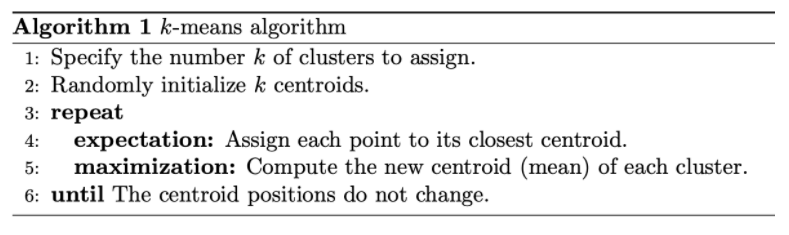

### Importing the Required Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the Dataset 

The next step is loading the dataset. The dataset consist of customer data and it can be downloaded from [here]. The data shows the annual income and the spending score of the customer based on genre and age.

In [2]:
dataset = pd.read_csv("Data_Customer_Mall.csv", sep=",")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Visualizing the dataset

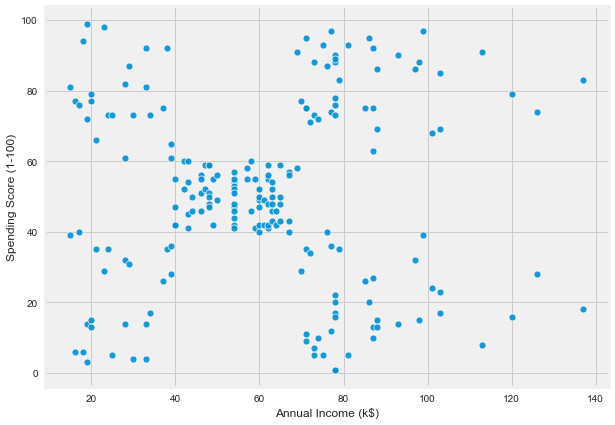

In [4]:
plt.figure(figsize=(9, 7))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=dataset, alpha=0.9)

In [5]:
data_x = dataset.iloc[:, 3:5]
data_x.head()

x_array =  np.array(data_x)
print(x_array)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

The process of transforming numerical features to use the same scale is known as feature scaling. In this case, we'll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1

In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

## Choosing the appropriate number of clusters:

**Elbow Method** : There's a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

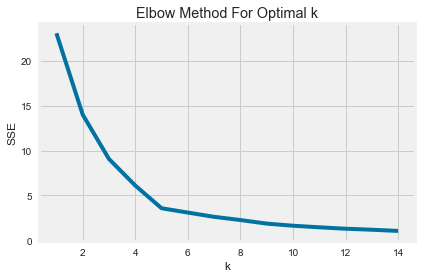

In [7]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(x_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
###Plotting Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In this case, the elbow is located at x = 5

**Silhouette Coefficient** : is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and How far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

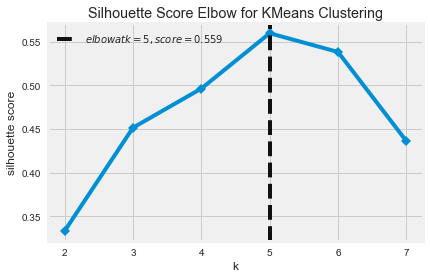

In [8]:
model = KMeans(random_state=123) 
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(x_scaled)    
visualizer.poof()

In [9]:
numerics = dataset[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numerics:
        scaler.fit(dataset[[i]])
        dataset[i] = scaler.transform(dataset[[i]])

In [10]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

After that, we add the new column, name = Cluster

In [11]:
dataset["Cluster"] = y_predicted
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,3
5,6,Female,22,0.016393,0.765306,4
6,7,Female,35,0.024590,0.051020,3
7,8,Female,23,0.024590,0.948980,4
8,9,Male,64,0.032787,0.020408,3
9,10,Female,30,0.032787,0.724490,4


In [12]:
km.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

### Visualizing The Clustering Result

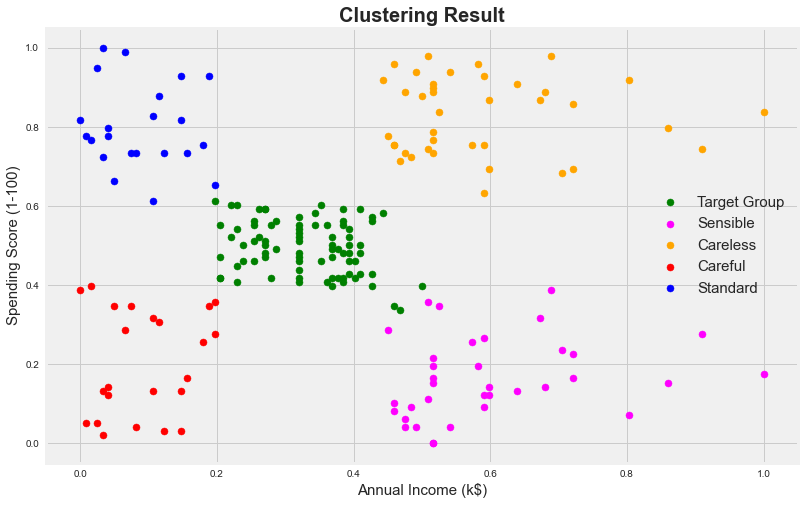

In [13]:
plt.figure(figsize=(12,8))
df1 = dataset[dataset.Cluster==0]
df2 = dataset[dataset.Cluster==1]
df3 = dataset[dataset.Cluster==2]
df4 = dataset[dataset.Cluster==3]
df5 = dataset[dataset.Cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='Target Group')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='magenta', label='Sensible')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='orange', label='Careless')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='red', label='Careful')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue', label='Standard')
plt.title('Clustering Result', fontweight='bold',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [14]:
dataset.to_csv('result_clustering_K-MEANS.csv')